# **Beautiful orders' visualization**
### *InfiniteWing*
### *2017-07-18*

Hello, this notebook seeks to create visualization of each order. For each visualization image, the y axis presents customer's order and x axis presents product(only shows the product that customer bought).

(The green shows the first time buy, and blue shows it is reordered.)

If you like it or get some inspiration, an upvote is appreciated.

PS:
Please correct me if there's something wrong on my code:)

### Load libraries

In [1]:
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import matplotlib

### Global var

In [2]:
orders={}
users={}

### Read prior order-products

In [3]:
fr = open("../input/order_products__prior.csv", 'r')
fr.readline()# skip header
lines=fr.readlines()
for i,line in enumerate(lines):
    datas=line.replace("\n","").split(",")
    order_id=int(datas[0])
    product_id=int(datas[1])
    reorderer=int(datas[3])
    if(order_id not in orders):
        orders[order_id]={}
    orders[order_id][product_id]=reorderer

### Read train order-products

In [4]:
fr = open("../input/order_products__train.csv", 'r')
fr.readline()# skip header
lines=fr.readlines()
for i,line in enumerate(lines):
    datas=line.replace("\n","").split(",")
    order_id=int(datas[0])
    product_id=int(datas[1])
    reorderer=int(datas[3])
    if(order_id not in orders):
        orders[order_id]={}
    orders[order_id][product_id]=reorderer

### Read orders

In [5]:
fr = open("../input/orders.csv", 'r')
fr.readline()# skip header
lines=fr.readlines()
for i,line in enumerate(lines):
    datas=line.replace("\n","").split(",")
    order_id=int(datas[0])
    user_id=int(datas[1])
    eval_set=(datas[2])
    order_number=int(datas[3])
    if(user_id not in users):
        users[user_id]={}
    if(eval_set=="prior"):
        users[user_id][order_number]=order_id
    elif(eval_set=="train"):
        users[user_id][order_number]=order_id
    if(eval_set=="test"):
        users[user_id]["test"]=order_id

### Show orders' visualization

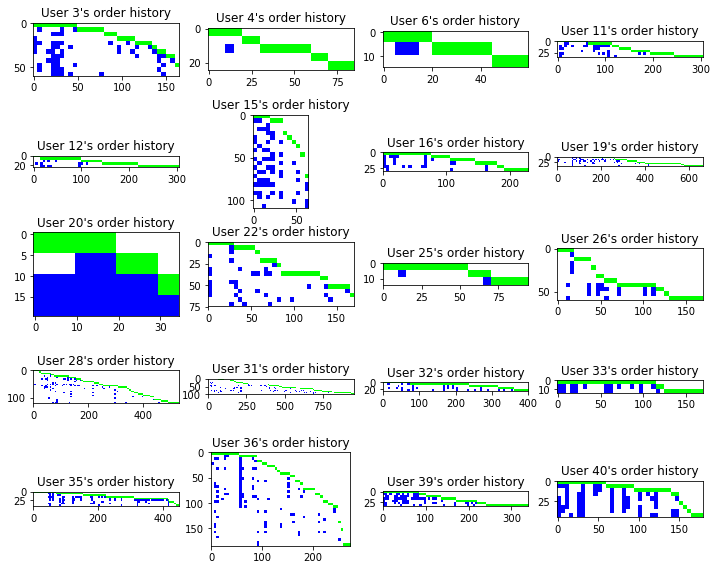

In [6]:
k=0
n_images = 20

fig = plt.figure(figsize=(12,10))
for user_id in users:
    #skip this user if he/she doesn't need to be predict
    if("test" not in users[user_id]):
        continue
    products_index={}
    products={}
    
    # count distinc product
    for order_number in users[user_id]:
        order_id=users[user_id][order_number]
        if(order_number=="test"):
            continue
        for index,product_id in enumerate(orders[order_id]):
            if(product_id not in products):
                products[product_id]=1
    
    test_order_number=users[user_id]["test"]
    i=0
    y=0
    box_width=5
    distinc_product_count=len(products)
    img = Image.new( "RGB", (distinc_product_count*box_width,(len(users[user_id])-1)*box_width) )
    
    #show image
    
    for order_number in users[user_id]:
        order_id=users[user_id][order_number]
        if(order_number=="test"):
            continue
        # default white
        colors=[(255,255,255) for j in range(distinc_product_count)]
        for product_id in orders[order_id]:
            if(product_id not in products_index):
                products_index[product_id]=i    
                i+=1
            if(orders[order_id][product_id]==0):# first time buy
                colors[products_index[product_id]]=(0,255,0)# green
            else:# reorder
                colors[products_index[product_id]]=(0,0,255)# blue
        for x,color in enumerate(colors):
            start_x=x*box_width
            start_y=y*box_width
            for offset_x in range(box_width):
                for offset_y in range(box_width):
                    img.putpixel( (start_x+offset_x,start_y+offset_y), color)
        y+=1
    ax = fig.add_subplot(5,4,k+1)
    plt.grid(False)
    plt.imshow(img)
    plt.title("User {}'s order history".format(user_id))
    
    # You can save image to your own folder
    #im.save( "vis/{}.jpg".format(user_id) ) 
    
    # Only show first 20 customers' order image
    k+=1
    if(k>=n_images):
        break

## *Thanks for reading. Good luck and have fun!*